In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import sklearn
from collections import Counter
%matplotlib inline

# train test split
from sklearn.model_selection import train_test_split

# presentation
from sklearn.preprocessing import MinMaxScaler, StandardScaler

#vectorzine
from sklearn.feature_extraction.text import TfidfVectorizer

# metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix

# model
import lightgbm as lgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [ ]:

df_train_raw = pd.read_csv('/content/drive/My Drive/data_topic_iden/cleaned_topic_detection_train_2.txt')
df_test_raw = pd.read_csv('/content/drive/My Drive/data_topic_iden/test_cleaned.txt',header=None)
df_test_raw.columns=['label','paragraph']

df_test_raw.head()

,label,paragraph
0,__label__Nha_dat,gấp hiện bên em đang cần thuê 1 phòng có diện_...
1,__label__Mang_internet_va_vien_thong,chào_noel đón mưa quà tặng nhân_dịp noel viett...
2,__label__Kinh_doanh_va_Cong_nghiep,khởi_công xây_dựng 33 căn nhà phố liền kề chỉ ...
3,__label__Sach,sáng ngày hôm_nay btc rất vui khi nhận được sá...
4,__label__Nha_dat,cần cho thuê căn_hộ chung_cư dưới sài đồng đối...


In [ ]:
# clean thêm
import re
def clean_text(text):
    # Loại bỏ ký tự đặc biệt
    text = re.sub(r'[^\w\s]', '', text)
    # Loại bỏ toàn bộ số
    text = re.sub(r'\d+', '', text)
    # Loại bỏ khoảng trắng thừa
    text = re.sub(r'\s+', ' ', text).strip()
    # Chuyển sang chữ thường
    text = text.lower()
    return text

df_train_raw['paragraph'] = df_train_raw['paragraph'].apply(clean_text)
df_test_raw['paragraph'] = df_test_raw['paragraph'].apply(clean_text)

**Mã hoá nhãn**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(df_train_raw['label'])
y_test = le.transform(df_test_raw['label'])
y_train


array([ 4, 15, 15, ...,  9, 16,  9])

In [ ]:
# train_df, test_df = train_test_split(df, test_size=0.2, random_state=42,
#                                                     shuffle=True, stratify=df['label'])

In [ ]:
# train_df

In [ ]:
# train_df.to_csv('train_hd.csv', index=False)
# test_df.to_csv('test_hd.csv', index=False)

# train_df_hd = pd.read_csv('train_hd.csv')
# test_df_hd = pd.read_csv('test_hd.csv')


In [ ]:
df_test_raw

In [ ]:
#Get stop_words
with open('/content/drive/My Drive/data_topic_iden/vietnamese-stopwords.txt', 'r', encoding='utf-8')as f:
    vietnamese_stopwords = [line.strip() for line in f]

## Biểu diễn văn bản bằng TF-IDF
tfidf = TfidfVectorizer(stop_words=vietnamese_stopwords,max_features=3000)
X_train_tfidf = tfidf.fit_transform(df_train_raw['paragraph'])
X_test_tfidf = tfidf.transform(df_test_raw['paragraph'])


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['bao', 'bay', 'biến', 'biệt', 'bây', 'bõm', 'bảo', 'bất', 'bẩy', 'bập', 'bắt', 'bội', 'chao', 'chi', 'chia', 'chu', 'chui', 'chuẩn', 'chà', 'chành', 'chí', 'chót', 'chùn', 'chăn', 'chũn', 'chưng', 'chạnh', 'chả', 'chầm', 'chầy', 'chập', 'chắn', 'chẳng', 'chết', 'chốc', 'chừ', 'chừng', 'coi', 'cu', 'cá', 'câu', 'cóc', 'công', 'cạnh', 'cảm', 'cầu', 'cật', 'cắt', 'cổ', 'cụ', 'cục', 'cực', 'da', 'dà', 'dĩ', 'dưng', 'dần', 'dầu', 'dịp', 'dở', 'dụng', 'gian', 'giá', 'giác', 'giời', 'ha', 'hiện', 'hoàn', 'hèn', 'hình', 'hô', 'hầu', 'hậu', 'hẳn', 'hồ', 'hỗ', 'hội', 'hợp', 'hự', 'khói', 'khô', 'khăn', 'khắc', 'khẳng', 'kia', 'kiện', 'kê', 'kì', 'kìa', 'kỳ', 'lai', 'le', 'liên', 'liệt', 'loạt', 'luận', 'luật', 'luốt', 'lình', 'lí', 'lô', 'lý', 'lập', 'lẽ', 'lị', 'lự', 'lực', 'mày', 'mòi', 'mù', 'mạng'

In [ ]:
# Tính các độ đo đánh giá mô hình (đánh giá mô hình pl)
def evaluate(model, x_test, y_test):
    pred = model.predict(x_test)
    acc = accuracy_score(y_test, pred)
    print("ACC: ", acc)
    print(classification_report(y_test,pred))


# Trực quan hoá một số thông tin (trực quan hóa mô hình pl)
def visualize_result(model, x_test, y_test):
    y_pred = model.predict(x_test)
    plt.figure(figsize=(12,7))
    sns.heatmap(confusion_matrix(y_test,y_pred),cmap='Blues',annot=True,linewidths=2,linecolor='white',fmt='d')

In [ ]:
# Huấn luyện mô hình Logistic Regression với TF-IDF(dùng thuật toán liblinear)
model = LogisticRegression(solver='liblinear', max_iter=300)
model.fit(X_train_tfidf, df_train_raw['label'])


LogisticRegression(max_iter=300, solver='liblinear')

ACC:  0.8543476090645902
                                       precision    recall  f1-score   support

                   __label__Chinh_tri       0.92      0.96      0.94       472
         __label__Con_nguoi_va_xa_hoi       0.94      0.94      0.94       205
               __label__Cong_nghe_moi       1.00      0.25      0.40        20
            __label__Do_an_va_do_uong       0.96      1.00      0.98      1425
                     __label__Du_lich       0.97      0.96      0.97       606
                    __label__Giai_tri       0.99      0.96      0.98       114
                    __label__Giao_duc       0.93      0.93      0.93       460
                  __label__Giao_thong       0.96      0.86      0.91        50
                    __label__Khoa_hoc       1.00      0.77      0.87        92
   __label__Kinh_doanh_va_Cong_nghiep       0.56      0.72      0.63      1407
         __label__Lam_dep_va_the_hinh       0.96      0.92      0.94       181
 __label__Mang_internet_va

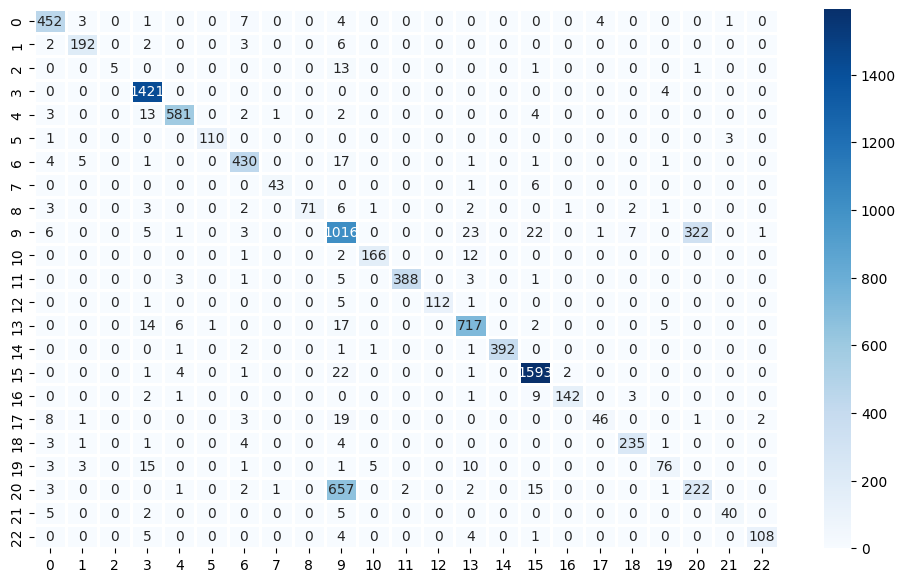

In [ ]:
# Đánh giá mô hình
evaluate(model,X_test_tfidf, df_test_raw['label'])
visualize_result(model,X_test_tfidf,df_test_raw['label'])

Khi nhìn kết quả đánh giá. Mô hình đạt độ chính xác tổng thể là 0.854. Đây là một kết quả khá tốt.
Một số lớp như __label__Chinh_tri, __label__Do_an_va_do_uong, __label__Du_lich, __label__Giai_tri, __label__Nghe_thuat, và __label__Nha_dat đều có F1-score cao (trên 0.9), cho thấy mô hình phân loại rất tốt các văn bản thuộc các lớp này.
Đặc biệt, các lớp như __label__Cong_nghe_moi, __label__Khoa_hoc, __label__Tai_chinh và __label__Phap_luat có kết quả F1-score rất thấp, điều này chỉ ra rằng mô hình đang gặp khó khăn trong việc phân loại các văn bản thuộc các lớp này.
Với việc recall và độ f1 rất thấp của một số label như Cong_nghe_moi, Tai_chinh, Kinh_doanh_va_Cong_nghiệp..cho thấy mô hình bỏ sót rất nhiều mẫu thuộc lớp này.
Phân tích ma trận nhầm lẫn: Trên đường chéo chính thể hiện số lượng dự đoán đúng, tuy nhiên số lượng dự đoán sai cũng khá nhiều, điển hình là label Tai_chinh và label Kinh_doanh_va_Cong_nghiep, điều này là do các lĩnh vực này tương quan mạnh với nhau(bao gồm nhau) nên các văn bản thuộc 2 nhãn này có các từ vựng (đặc trưng) gần nghĩa với nhau => nên mô mình gặp khó khăn trong việc phân loại chính xác các lớp tương quan gần gũi với nhau.

In [ ]:
from sklearn.svm import SVC

# Huấn luyện mô hình SVM với TF-IDF
model_svm = SVC(kernel='sigmoid', random_state=42)
model_svm.fit(X_train_tfidf, df_train_raw['label'])

SVC(kernel='sigmoid', random_state=42)

ACC:  0.8705201158031347
                                       precision    recall  f1-score   support

                   __label__Chinh_tri       0.94      0.95      0.95       472
         __label__Con_nguoi_va_xa_hoi       0.91      0.94      0.92       205
               __label__Cong_nghe_moi       1.00      0.55      0.71        20
            __label__Do_an_va_do_uong       0.98      0.99      0.98      1425
                     __label__Du_lich       0.97      0.96      0.97       606
                    __label__Giai_tri       0.99      0.98      0.99       114
                    __label__Giao_duc       0.93      0.94      0.93       460
                  __label__Giao_thong       0.92      0.98      0.95        50
                    __label__Khoa_hoc       0.97      0.84      0.90        92
   __label__Kinh_doanh_va_Cong_nghiep       0.59      0.79      0.67      1407
         __label__Lam_dep_va_the_hinh       0.97      0.95      0.96       181
 __label__Mang_internet_va

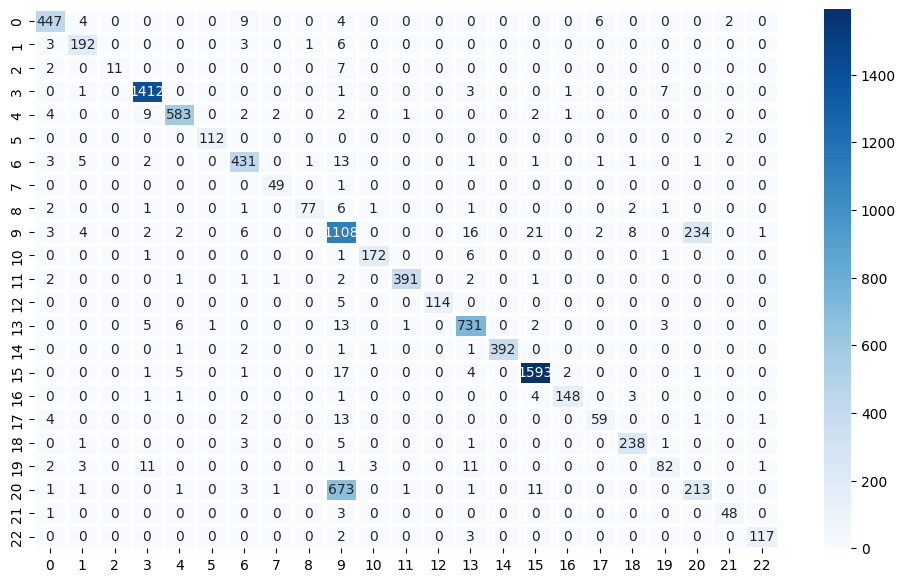

In [ ]:

# Đánh giá mô hình
evaluate(model_svm,X_test_tfidf,df_test_raw['label'])
visualize_result(model_svm,X_test_tfidf,df_test_raw['label'])